In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
ds = pd.read_csv("/content/Churn_Modelling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Remove attributes that are unique to the customer (attributes belonging to candidate keys)
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# binary encoding for gender
ds.loc[ds["Gender"] == "Male", ["Gender"]] = 0
ds.loc[ds["Gender"] == "Female", ["Gender"]] = 1

# one hot enc. geography
ds = pd.get_dummies(ds, columns=["Geography"], dtype='int32')

In [ ]:
def min_max_normalize( name ):
  global ds
  ds[name] = ds[name].astype('float32')
  ds[name] = ((ds[name] - ds[name].min())-(ds[name].max()-ds[name].min()))/(ds[name].max()-ds[name].min())
cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

for col in cols:
  min_max_normalize(col)

In [ ]:
from sklearn.model_selection import train_test_split
X = ds.drop(["Exited"], axis=1).to_numpy().astype(np.float32)
y = ds["Exited"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=50)
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=50,
              random_state=1, solver='lbfgs')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, y_pred)}")

Accuracy is 0.808


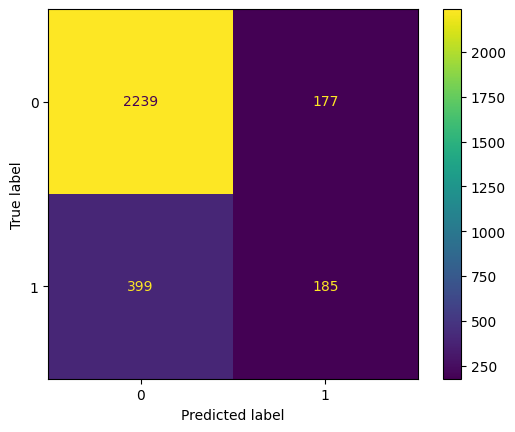

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()